# Pandas Test - Real life Exercise

In [1]:
import pandas as pd

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [3]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
187026,2021-week_46,AD07888LP8,iDreamsky Technology,DE,yes,NaN,Qality,ManualY
95452,2021-week_39,AD008MH8TK,RelayFoods,JP,yes,NaN,Qality,DNNQ
333828,2022-week_05,AD008OCO80,Fancy,GB,yes,NaN,Qality,DNNQ
96023,2021-week_39,AD08K76G6L,Modanisa,JP,yes,NaN,Qality,DNNQ
29129,2021-week_35,AD07X68V7N,MoJoe Brewing Company,DE,no,False,Yield,RuleBasedY


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [53]:
ad_recs_annotated['year'] = ad_recs_annotated.week_id.apply(lambda w: w.split('-')[0])
ad_recs_annotated['quarter'] = ad_recs_annotated.week_id.apply(lambda w: int(w.split('_')[1]) // 13 + 1)
ad_recs_annotated['is_success_int'] = ad_recs_annotated.is_success.map({'yes': 1, 'no': 0})
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed,week_number
35164,2021-week_35,AD078CR8WY,Puentes Company,IN,no,True,Yield,UserPopY,2021,3,0,True,35
343673,2022-week_06,AD07HYT88Z,RelayFoods,DE,yes,NaN,Qality,UserPopQ,2022,1,1,False,6
351639,2022-week_06,AD07Y8JC8Z,RelayFoods,IN,yes,NaN,Qality,UserPopQ,2022,1,1,False,6
141441,2021-week_42,AD08CT8HVN,Search Million Culture,US,yes,NaN,Qality,XGBQ,2021,4,1,False,42
330759,2022-week_05,AD0886WCQ7,Fry Multimedia,DE,yes,NaN,Qality,DNNQ,2022,1,1,False,5


In [61]:
ad_recs_annotated.is_sever.isnull().sum() # Yes, we have NaNs 

304195

In [62]:
ad_recs_annotated[ad_recs_annotated.is_sever.notnull()].is_success.value_counts()

no     69576
yes       17
Name: is_success, dtype: int64

In [63]:
ad_recs_annotated['is_sever_fixed'] = ad_recs_annotated.is_sever.fillna(False)
ad_recs_annotated['is_sever_fixed'].isnull().sum()

0

In [67]:
ad_recs_annotated.is_sever.value_counts(dropna=False)

NaN      304195
True      44689
False     24904
Name: is_sever, dtype: int64

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

A to Q1:

In [72]:
print(ad_recs_annotated[ad_recs_annotated.region == "US"].shape)
print(ad_recs_annotated.query("region == 'US'").shape)

(103846, 13)
(103846, 13)


A to Q2:

In [73]:
print(ad_recs_annotated[(ad_recs_annotated.region == "US") & 
                        (ad_recs_annotated.is_success == "yes")].shape)
print(ad_recs_annotated.query('region == "US" and is_success == "yes"').shape)

(88918, 13)
(88918, 13)


A to Q11:

In [80]:
def is_requester_3_words(requester):
    return len(requester.split(' ') ) == 3

In [31]:
three_words_requesters = ad_recs_annotated[ad_recs_annotated.requester.apply(is_requester_3_words)]
three_words_requesters.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,is_success_int,is_sever_fixed
6784,2021-week_33,AD07TN6YZW,Search Million Culture,IN,yes,NaN,Qality,UserPopQ,2021,3,1,False
97608,2021-week_39,AD0090AXS8,Search Million Culture,US,yes,NaN,Qality,RNNQ,2021,4,1,False
161728,2021-week_44,AD07888YGJ,MoJoe Brewing Company,GB,yes,NaN,Yield,DNNY,2021,4,1,False
205918,2021-week_47,AD08YNGGHG,Search Million Culture,GB,yes,NaN,Qality,DNNQ,2021,4,1,False
163469,2021-week_44,AD07R8VRMR,Search Million Culture,GB,yes,NaN,Qality,DNNQ,2021,4,1,False


In [32]:
three_words_requesters.shape

(118141, 12)

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


A to Q1:

In [86]:
sorted(ad_recs_annotated.week_id.unique())

['2021-week_33',
 '2021-week_34',
 '2021-week_35',
 '2021-week_36',
 '2021-week_37',
 '2021-week_38',
 '2021-week_39',
 '2021-week_40',
 '2021-week_41',
 '2021-week_42',
 '2021-week_43',
 '2021-week_44',
 '2021-week_45',
 '2021-week_46',
 '2021-week_47',
 '2021-week_48',
 '2021-week_49',
 '2021-week_50',
 '2021-week_51',
 '2022-week_01',
 '2022-week_02',
 '2022-week_03',
 '2022-week_04',
 '2022-week_05',
 '2022-week_06',
 '2022-week_52']

In [83]:
ad_recs_annotated.week_id.value_counts().sort_index()

2021-week_33    14356
2021-week_34    14371
2021-week_35    14373
2021-week_36    14390
2021-week_37    14392
2021-week_38    14347
2021-week_39    14416
2021-week_40    14406
2021-week_41    14380
2021-week_42    14376
2021-week_43    14367
2021-week_44    14299
2021-week_45    14440
2021-week_46    14350
2021-week_47    14402
2021-week_48    14404
2021-week_49    14337
2021-week_50    14404
2021-week_51    12805
2022-week_01    14385
2022-week_02    14423
2022-week_03    14317
2022-week_04    14367
2022-week_05    14362
2022-week_06    14389
2022-week_52    15930
Name: week_id, dtype: int64

A to Q2:

Option 1:

In [40]:
ad_recs_annotated['week_number'] = ad_recs_annotated.week_id.apply(lambda x: int(x.split('_')[1]))

In [42]:
ad_recs_annotated.groupby('region').week_number.unique()

region
DE    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
GB    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
IN    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
JP    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
US    [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4...
Name: week_number, dtype: object

In [45]:
def find_missing_week_id(week_ids):
    missing_weeks = []
    for i in range (33, 53):
        if i not in week_ids:
            missing_weeks.append(i)
    return missing_weeks

In [46]:
ad_recs_annotated.groupby('region').week_number.unique().apply(find_missing_week_id)

region
DE      []
GB      []
IN      []
JP    [51]
US      []
Name: week_number, dtype: object

Option 2:

In [102]:
row_count_per_week_and_region = ad_recs_annotated.groupby(['week_id', 'region']).size()
row_count_per_week_and_region.head()

week_id       region
2021-week_33  DE        2395
              GB        3180
              IN        3196
              JP        1611
              US        3974
dtype: int64

In [104]:
row_count_per_week_and_region = row_count_per_week_and_region.unstack('region')
row_count_per_week_and_region.head()

region,DE,GB,IN,JP,US
week_id,,,,,
2021-week_33,2395.0,3180.0,3196.0,1611.0,3974.0
2021-week_34,2360.0,3187.0,3219.0,1599.0,4006.0
2021-week_35,2393.0,3209.0,3209.0,1580.0,3982.0
2021-week_36,2401.0,3209.0,3213.0,1589.0,3978.0
2021-week_37,2404.0,3181.0,3183.0,1644.0,3980.0


In [114]:
row_count_per_week_and_region.sample().iloc[0]

region
DE    2378.0
GB    3175.0
IN    3207.0
JP    1578.0
US    3979.0
Name: 2022-week_03, dtype: float64

In [112]:
def count_nans_in_row(row):
    return row.isnull().sum()

In [120]:
row_count_per_week_and_region.apply(count_nans_in_row, axis=1)

week_id
2021-week_33    0
2021-week_34    0
2021-week_35    0
2021-week_36    0
2021-week_37    0
2021-week_38    0
2021-week_39    0
2021-week_40    0
2021-week_41    0
2021-week_42    0
2021-week_43    0
2021-week_44    0
2021-week_45    0
2021-week_46    0
2021-week_47    0
2021-week_48    0
2021-week_49    0
2021-week_50    0
2021-week_51    1
2022-week_01    0
2022-week_02    0
2022-week_03    0
2022-week_04    0
2022-week_05    0
2022-week_06    0
2022-week_52    0
dtype: int64

In [115]:
count_nans_in_row(row_count_per_week_and_region.iloc[0])

0

In [117]:
count_nans_in_row(pd.Series([None, 1, 2, None]))

2

In [98]:
ad_recs_annotated.groupby(['week_id', 'region']).size().unstack(['region']).apply(lambda row: 'None' if row.isnull().sum() == 0 else row[row.isnull()].index)

region
DE                                                 None
GB                                                 None
IN                                                 None
JP    Index(['2021-week_51'], dtype='object', name='...
US                                                 None
dtype: object

Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [4]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

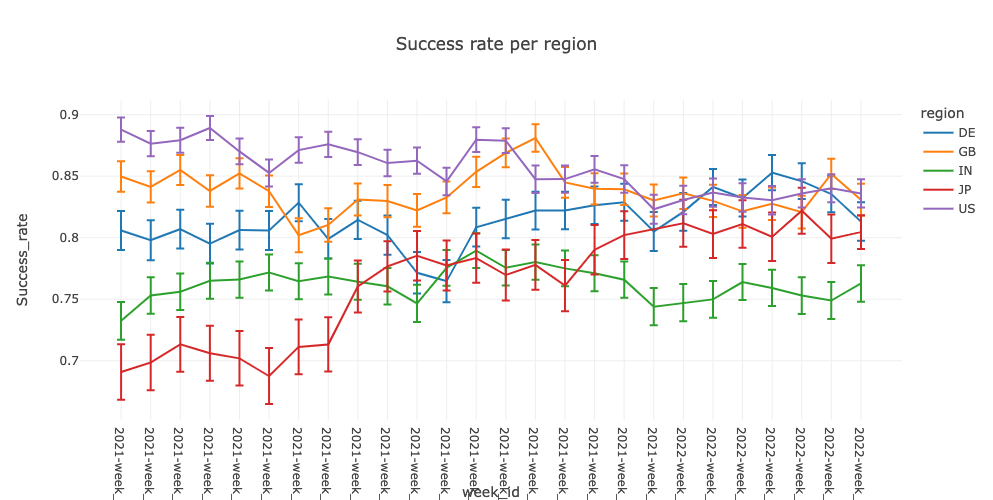

Produce the following requestser proportion graph:

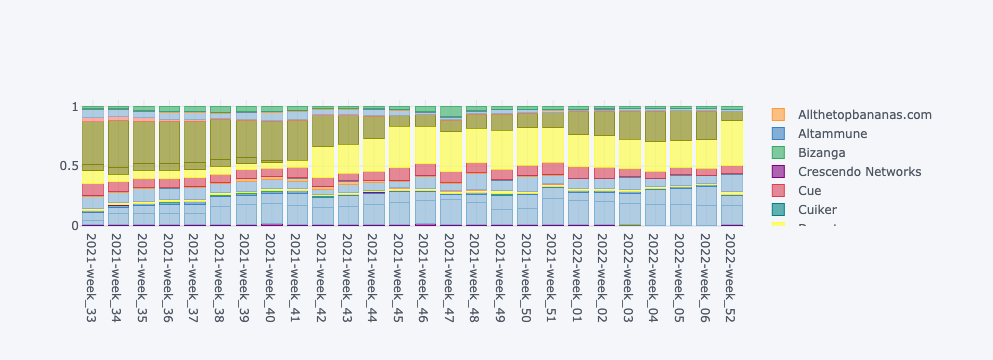

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)